In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the data
Data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#drop
Data = Data.drop(['tag_label'], axis = 1)
test = test.drop(['tag_label'], axis = 1)

# Slicing
train = Data.iloc[:,:54]
y     = Data.iloc[:,54:]
m     = len(train)

# Organize the data
ID= np.arange(1,2001)
train = train.to_numpy()
y = y.to_numpy()
test = test.to_numpy()

# Print
Data.info()
print(train.shape)
print(test.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data_channel                  8000 non-null   int64  
 1   timedelta                     8000 non-null   int64  
 2   n_tokens_title                8000 non-null   int64  
 3   n_tokens_content              8000 non-null   int64  
 4   n_unique_tokens               8000 non-null   float64
 5   n_non_stop_words              8000 non-null   float64
 6   n_non_stop_unique_tokens      8000 non-null   float64
 7   num_hrefs                     8000 non-null   int64  
 8   num_self_hrefs                8000 non-null   int64  
 9   num_imgs                      8000 non-null   int64  
 10  num_videos                    8000 non-null   int64  
 11  average_token_length          8000 non-null   float64
 12  num_keywords                  8000 non-null   int64  
 13  kw_

In [3]:
#Standardization
# train = (train-train.mean())/(train.std())
# test = (test-test.mean())/(test.std())

# Normalization
train = (train-train.min()) / (train.max()-train.min())
test  = (test-test.min())  / (test.max()-test.min())

# Add the one's columns
x_train = np.hstack([np.ones(y.shape) , train])
x_test  = np.hstack([np.ones((2000, 1)) , test])

print(x_train)
print(x_test)
print(x_train.shape)
print(x_test.shape)

[[1.00000000e+00 7.11489729e-06 8.30071351e-05 ... 9.48652972e-07
  1.36368865e-06 1.30558365e-03]
 [1.00000000e+00 5.92908108e-06 2.94082421e-04 ... 1.18581622e-06
  1.77872432e-06 1.54274690e-03]
 [1.00000000e+00 3.55744865e-06 2.83410075e-04 ... 1.42297946e-06
  1.54156108e-06 1.15617081e-03]
 ...
 [1.00000000e+00 1.18581622e-06 5.72749232e-04 ... 1.18581622e-06
  1.77872432e-06 1.66132852e-03]
 [1.00000000e+00 7.11489729e-06 2.88153340e-04 ... 1.18581622e-06
  1.77872432e-06 1.54274690e-03]
 [1.00000000e+00 7.11489729e-06 1.95659675e-04 ... 7.70780540e-07
  1.36368865e-06 2.33617653e-02]]
[[1.00000000e+00 7.11489729e-06 3.92505167e-04 ... 1.18581622e-06
  1.42297946e-06 1.03166011e-03]
 [1.00000000e+00 5.92908108e-06 3.55744865e-05 ... 1.18581622e-06
  1.77872432e-06 7.70780540e-05]
 [1.00000000e+00 5.92908108e-06 3.39143438e-04 ... 1.42297946e-06
  1.66014270e-06 4.27012419e-03]
 ...
 [1.00000000e+00 1.18581622e-06 4.92113729e-04 ... 1.30439784e-06
  1.28957513e-06 1.30558365e-03]

In [4]:
def hypothesis(x,theta):
    return (np.dot(x,theta.T))

In [5]:
def cost_function(x,theta,y):
    h = hypothesis(x,theta)
    j = (1/(2*m))*np.sum(np.square(h-y))
    return j

In [6]:
def grdient_decsend(iterations,alpha,lmda,x,y):
#     theta=np.random.rand(1,x.shape[1])
#     theta=np.full((1,x.shape[1]),0.5)
    theta=np.zeros((1,x.shape[1]))
    cost_history=[]
    for i in range(iterations):
        h = hypothesis(x,theta)
        theta = theta * ( 1-( (alpha*lmda)/m) ) - ( (alpha/m) * ( ((h-y).T).dot(x) ) )
#       matrix(1,54) =  matrix(1,54) - matrix(1,6000) * matrix(6000,54)
        cost_history.append(cost_function(x,theta,y))
    return theta,cost_history

In [7]:
# Run Linear Regression
theta,cost_history = grdient_decsend(200,0.05,0.001,x_train,y)
print("Theta:",theta)
print("Cost Functhion:",cost_function(x_train,theta,y))

Theta: [[ 1.06673811e-01 -1.15032950e-07  7.02634498e-05  1.62063731e-06
   8.26257166e-05  1.92037032e-07  2.40657933e-07  2.02779658e-07
   2.39869569e-06  4.02862008e-07  2.22286140e-06  8.91338001e-07
   6.30335414e-07  1.11969369e-06  1.85924323e-05  5.15202922e-04
   1.10883048e-04  1.26802317e-03  4.34827158e-02  2.59249428e-02
   2.81159784e-04  1.52563985e-03  6.87455574e-04  5.78302774e-04
   2.45650559e-03  1.44648024e-03  1.42222348e-07  1.37637053e-07
   1.20742634e-07  1.62799557e-07  1.45789480e-07  1.37553258e-07
   1.65219950e-07  1.76277673e-07  1.36089957e-07  1.59607035e-07
   8.89020522e-08  2.46230061e-07  1.28144104e-07  2.16011395e-07
   1.61060386e-07  1.36546620e-07  1.30675981e-07  2.12119337e-07
   1.55238664e-07  2.02475731e-07  1.41555809e-07  2.79699798e-07
   6.84413759e-08  2.25235104e-08  1.08282706e-07  7.92765499e-07
   4.40758920e-07 -2.77770934e-08  1.07936657e-03]]
Cost Functhion: 0.025697870660207577


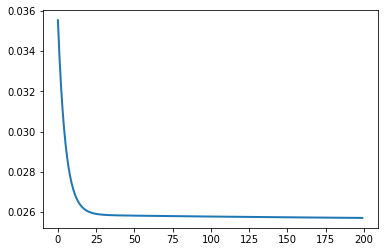

In [8]:
# Plotting Cost Function
plt.plot(np.arange(len(cost_history)), cost_history, lw=2)

In [9]:
# Predictive the test data.
y_final = hypothesis(x_test,theta)
print(y_final.shape)
ID=ID.reshape(2000,1)

(2000, 1)


In [10]:
# Creating the csv file 
submission = np.concatenate([ ID , y_final ], axis=1)
submission = pd.DataFrame(submission)
submission.to_csv("Submission.csv",header =['Id','abs_title_sentiment_polarity'],index=False)

In [11]:
# Editting
r = pd.read_csv('submission.csv')
r['Id'] = r['Id'].astype(int)
r.to_csv("Submission.csv",header = ['Id','abs_title_sentiment_polarity'],index=False)
r = pd.read_csv('submission.csv')
r

,Id,abs_title_sentiment_polarity
0,1,0.155338
1,2,0.158726
2,3,0.159751
3,4,0.153602
4,5,0.154207
...,...,...
1995,1996,0.158097
1996,1997,0.109391
1997,1998,0.166351
1998,1999,0.146892
